In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")


In [ ]:
path = "/content/drive/MyDrive/historical_data.csv"

In [ ]:
df = pd.read_csv(path, parse_dates=["created_at","actual_delivery_time"])


In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (197428, 16)
Columns: ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']


In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [ ]:
df.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428,197421,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000
std,1.524867,NaN,NaN,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902


In [ ]:
# delivery duration(seconds) calculate
df["delivery_duration_sec"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()
df["delivery_duration_sec"]


,delivery_duration_sec
0,3779.0
1,4024.0
2,1781.0
3,3075.0
4,2390.0
...,...
197423,3907.0
197424,3383.0
197425,3008.0
197426,3907.0


In [ ]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_sec
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0


In [ ]:
print("Target Summary (delivery_duration_sec):")
df["delivery_duration_sec"].describe()

Target Summary (delivery_duration_sec):


,delivery_duration_sec
count,1.974210e+05
mean,2.908257e+03
std,1.922961e+04
min,1.010000e+02
25%,2.104000e+03
50%,2.660000e+03
75%,3.381000e+03
max,8.516859e+06


In [ ]:
# Missing values check
print("\nMissing Values per column:")
df.isnull().sum()


Missing Values per column:


,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


**Raw EDA (Exploratory Data Analysis)**

Missing Values Analysis

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

,0
total_onshift_dashers,16262
total_busy_dashers,16262
total_outstanding_orders,16262
store_primary_category,4760
order_protocol,995
market_id,987
estimated_store_to_consumer_driving_duration,526
actual_delivery_time,7
delivery_duration_sec,7
num_distinct_items,0


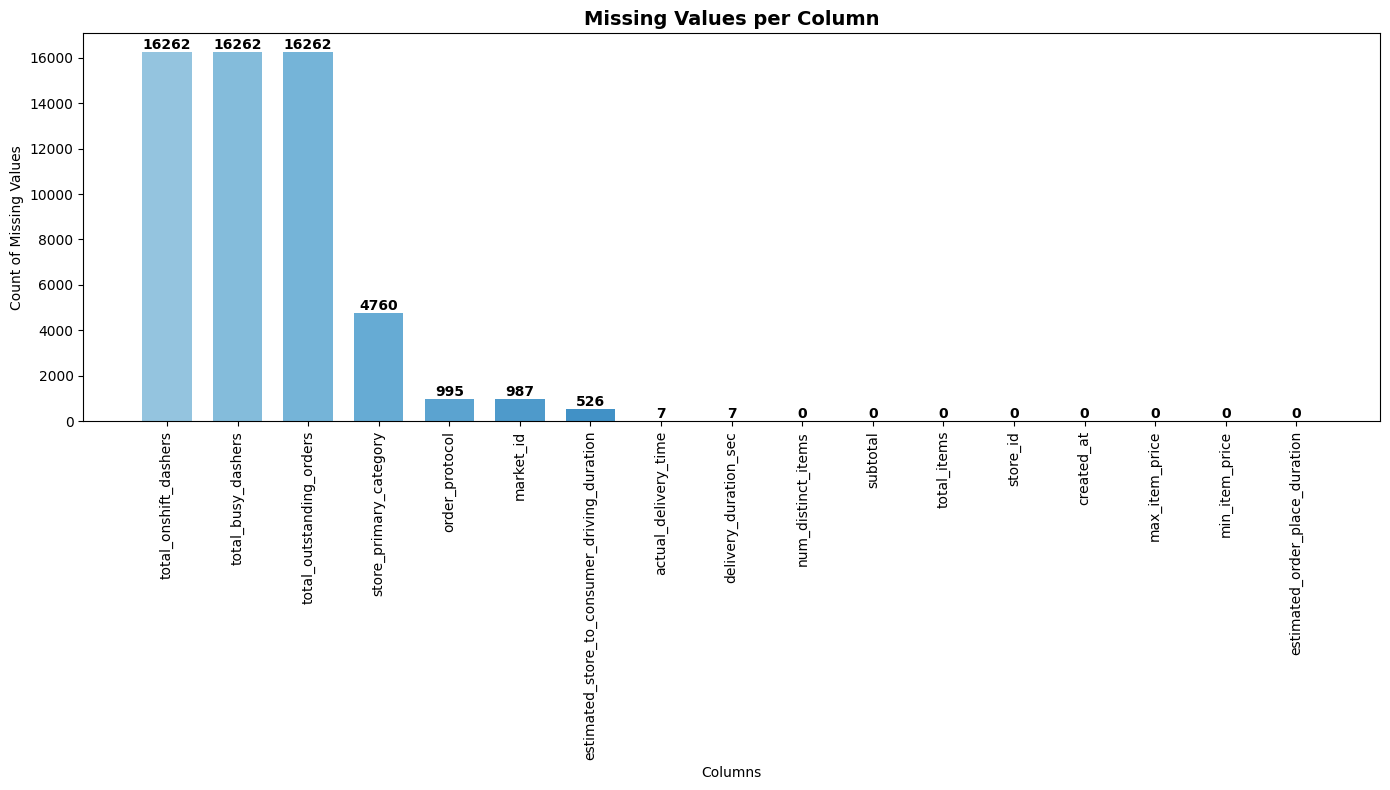

In [ ]:
plt.figure(figsize=(14,8))

colors = plt.cm.Blues(np.linspace(0.4, 1, len(missing)))
ax = plt.bar(missing.index, missing.values, color=colors, width=0.7)

for p in ax:
    plt.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='black'
    )

plt.xticks(rotation=90)
plt.title("Missing Values per Column", fontsize=14, fontweight="bold")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()



Target Variable Distribution

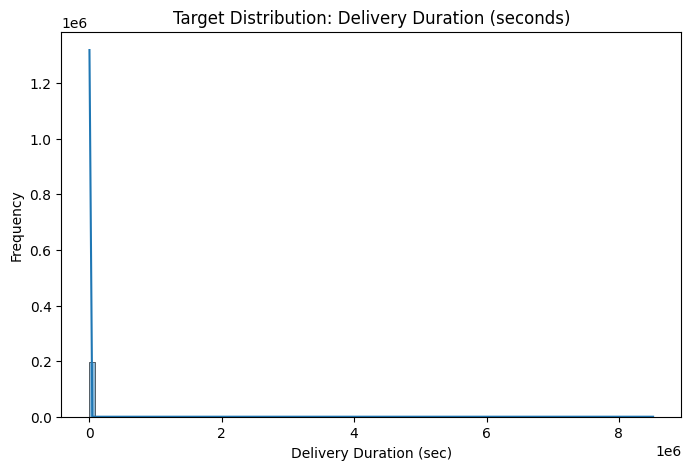

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_duration_sec'], bins=100, kde=True)
plt.title("Target Distribution: Delivery Duration (seconds)")
plt.xlabel("Delivery Duration (sec)")
plt.ylabel("Frequency")
plt.show()


Feature Distributions (Numerical)

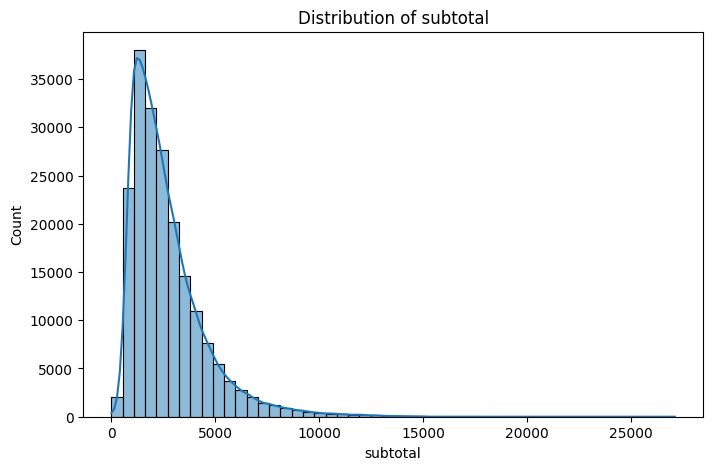

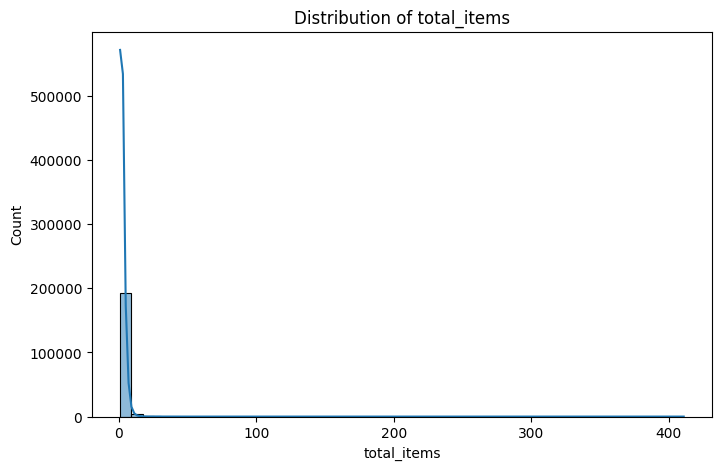

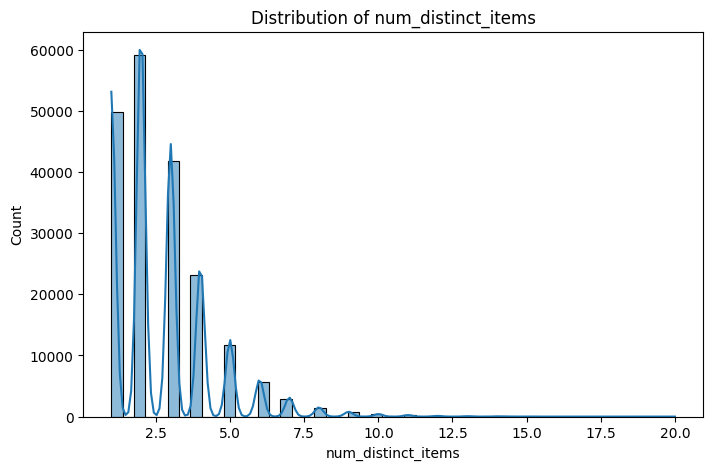

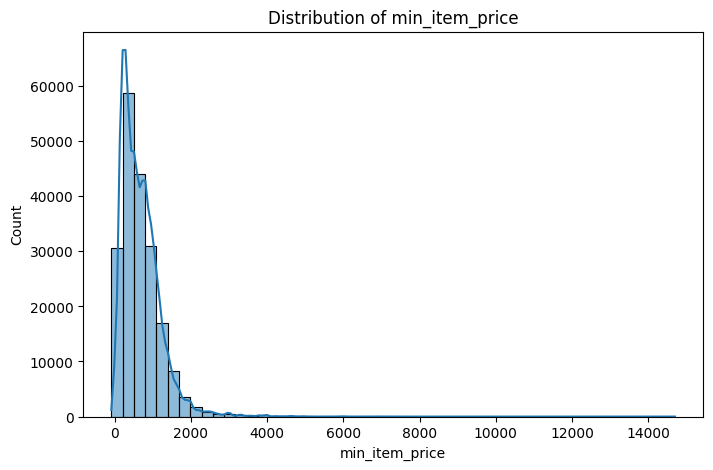

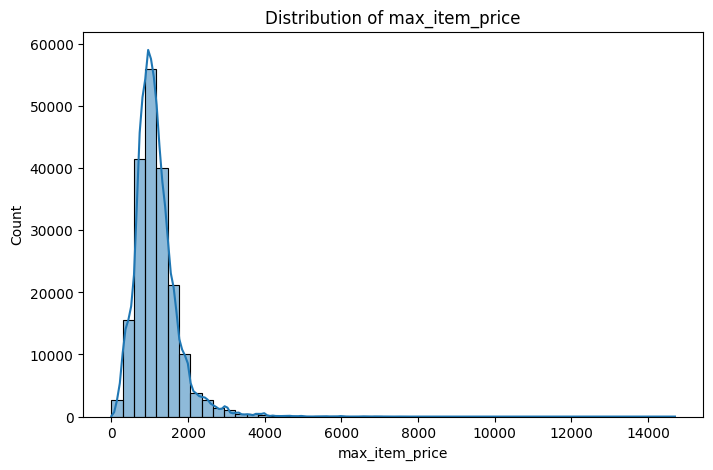

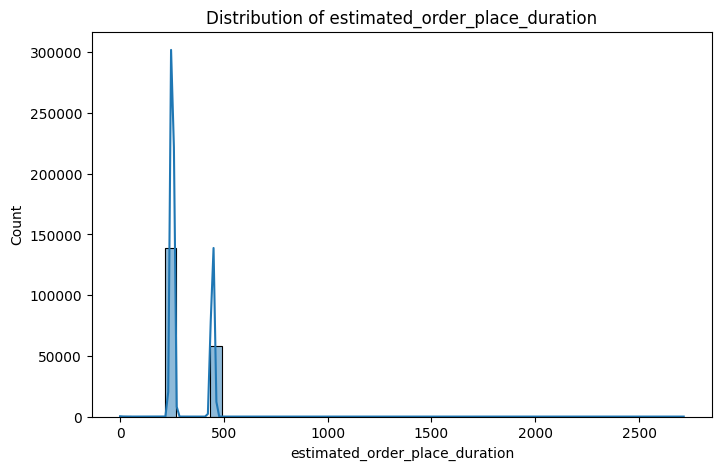

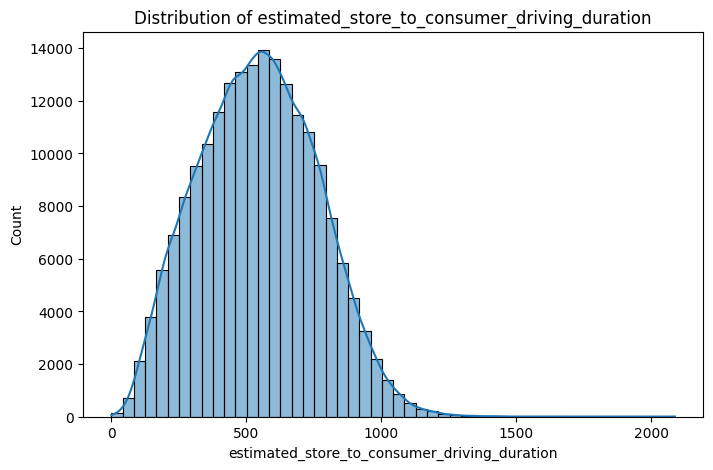

In [ ]:
num_cols = ['subtotal','total_items','num_distinct_items',
            'min_item_price','max_item_price',
            'estimated_order_place_duration','estimated_store_to_consumer_driving_duration']

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Categorical Features

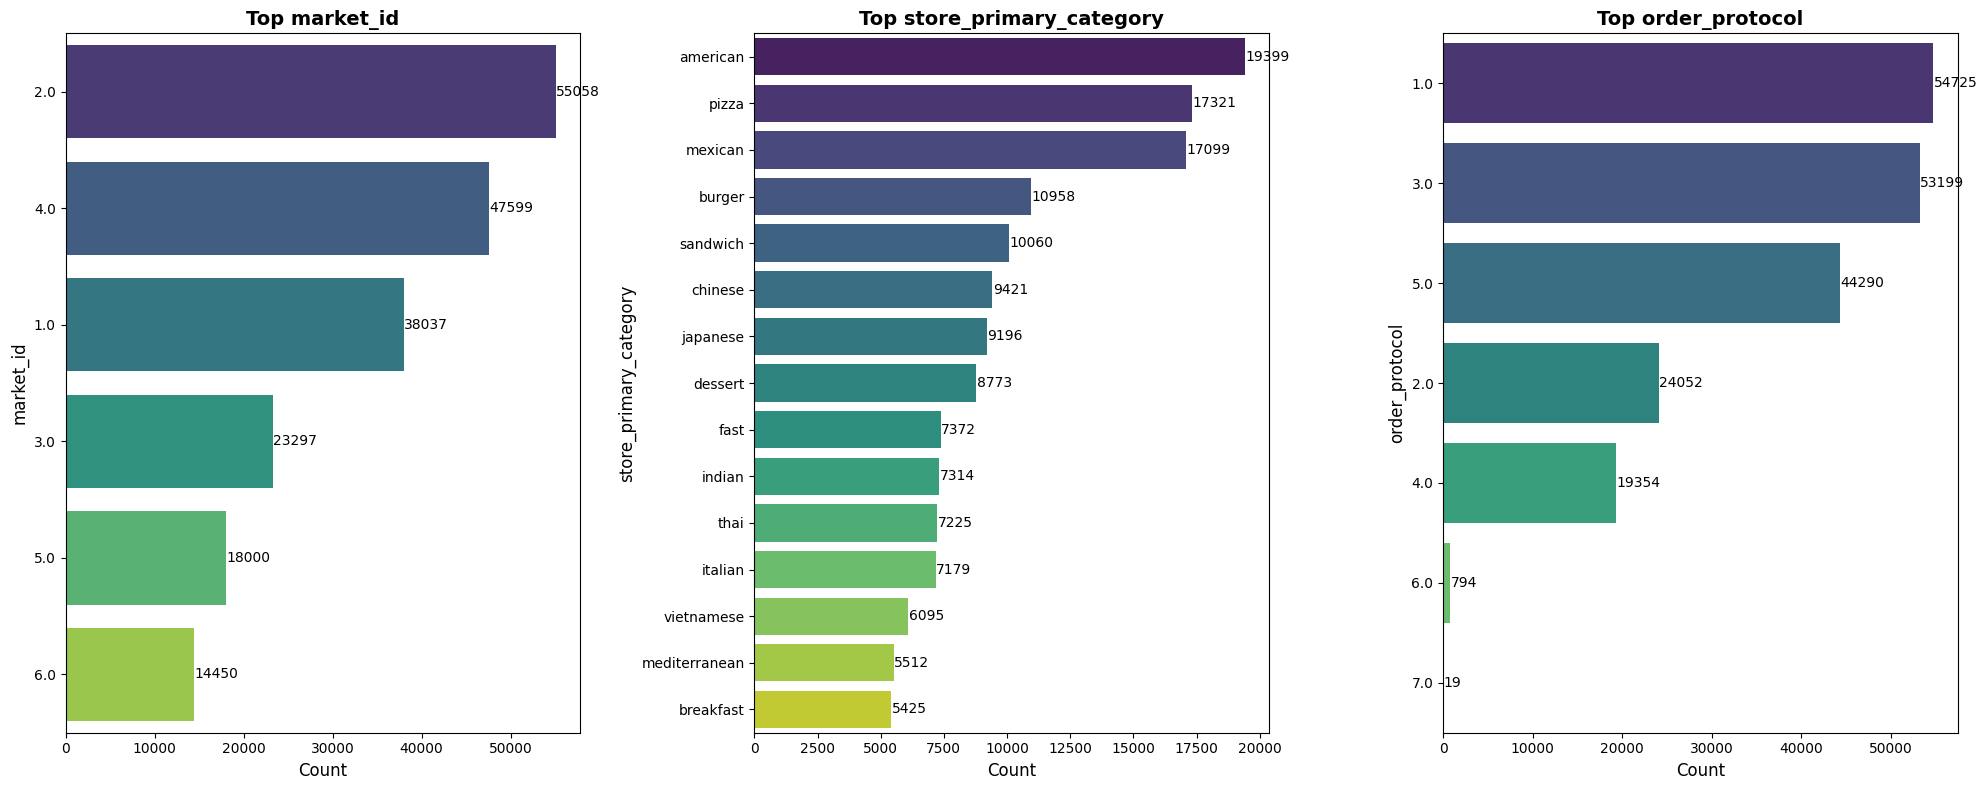

In [ ]:
cat_cols = ['market_id', 'store_primary_category', 'order_protocol']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

for i, col in enumerate(cat_cols):
    ax = sns.countplot(
        y=df[col],
        order=df[col].value_counts().index[:15],
        palette="viridis",
        ax=axes[i]
    )
    ax.set_title(f"Top {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Count", fontsize=12)
    ax.set_ylabel(col, fontsize=12)

    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_width())}",
            (p.get_width() + 20, p.get_y() + p.get_height() / 2),
            ha="left", va="center", fontsize=10
        )

plt.tight_layout()
plt.show()




Correlation Analysis

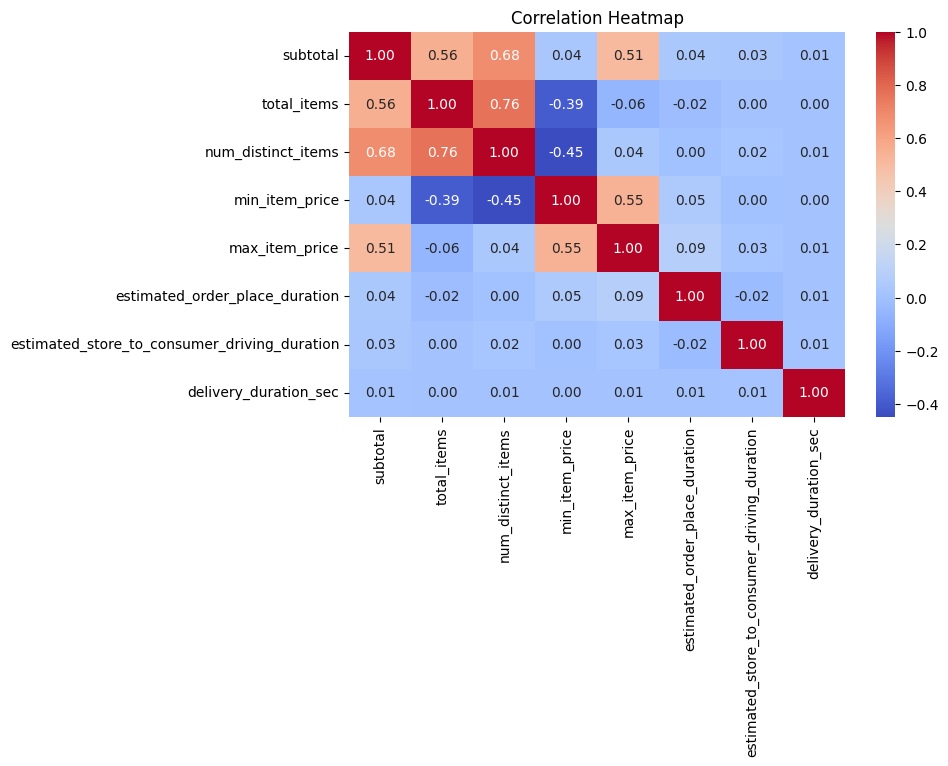

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols + ['delivery_duration_sec']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Outlier Detection (Boxplots)

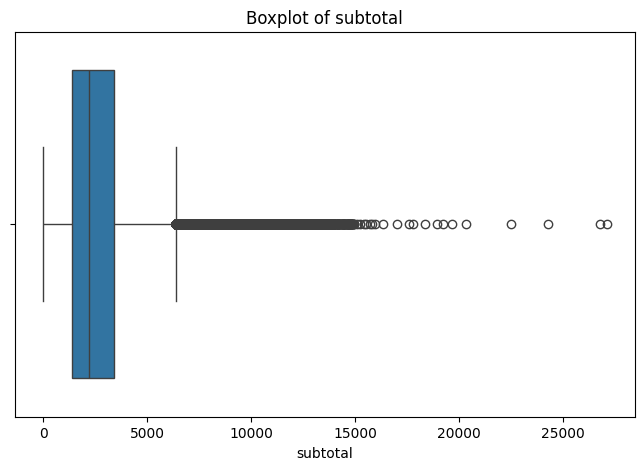

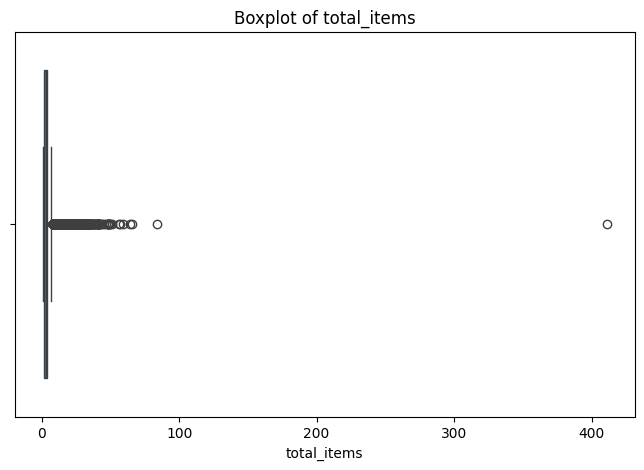

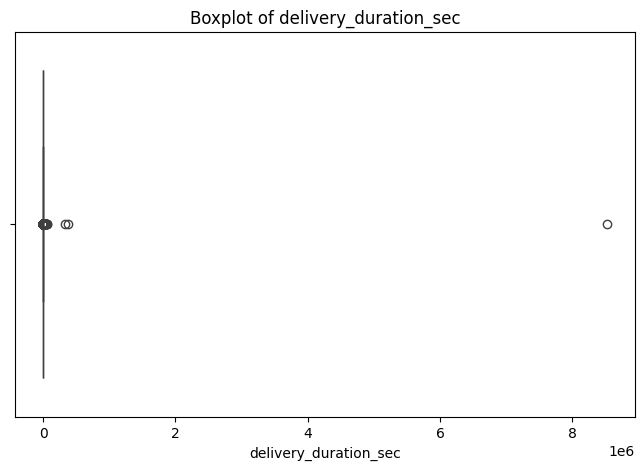

In [ ]:
for col in ['subtotal','total_items','delivery_duration_sec']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


**Data Cleaning & Preprocessing**

Missing Values Handling

In [ ]:
#Drop rows with missing target or essential datetime
df = df.dropna(subset=['delivery_duration_sec', 'actual_delivery_time'])
print("After dropping target & actual_delivery_time missing rows:", df.shape)



After dropping target & actual_delivery_time missing rows: (197421, 17)


In [ ]:
#Handle categorical missing values
df['market_id'].fillna(df['market_id'].mode()[0], inplace=True)
df['store_primary_category'].fillna("Unknown", inplace=True)
df['order_protocol'].fillna(df['order_protocol'].mode()[0], inplace=True)


In [ ]:
#Handle numeric missing values with median
num_cols = ['total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [ ]:
df.isnull().sum()


,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


Duplicates Check

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

duplicates = df[df.duplicated()]
print("\nDuplicate rows (if any):")
duplicates.head()


Number of duplicate rows: 0

Duplicate rows (if any):


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_sec


Data Types Fixing

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df.dtypes


,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,int64
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


Feature Engineering (Basic)

In [ ]:
df['delivery_duration_sec'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek

df[['delivery_duration_sec', 'order_hour', 'order_dayofweek']].head()



,delivery_duration_sec,order_hour,order_dayofweek
0,3779.0,22,4
1,4024.0,21,1
2,1781.0,20,3
3,3075.0,21,1
4,2390.0,2,6


Outlier Detection & Treatment (Initial)

In [ ]:
numeric_cols = ['delivery_duration_sec', 'subtotal', 'total_items']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers detected")


delivery_duration_sec: 6278 outliers detected
subtotal: 9054 outliers detected
total_items: 9587 outliers detected


In [ ]:
def cap_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

    print(f"Outliers capped in column: {column}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}\n")

cols_to_cap = ['delivery_duration_sec', 'subtotal', 'total_items']

for col in cols_to_cap:
    cap_outliers(df, col)


Outliers capped in column: delivery_duration_sec
Lower bound: 188.5, Upper bound: 5296.5

Outliers capped in column: subtotal
Lower bound: -1592.5, Upper bound: 6387.5

Outliers capped in column: total_items
Lower bound: -1.0, Upper bound: 7.0



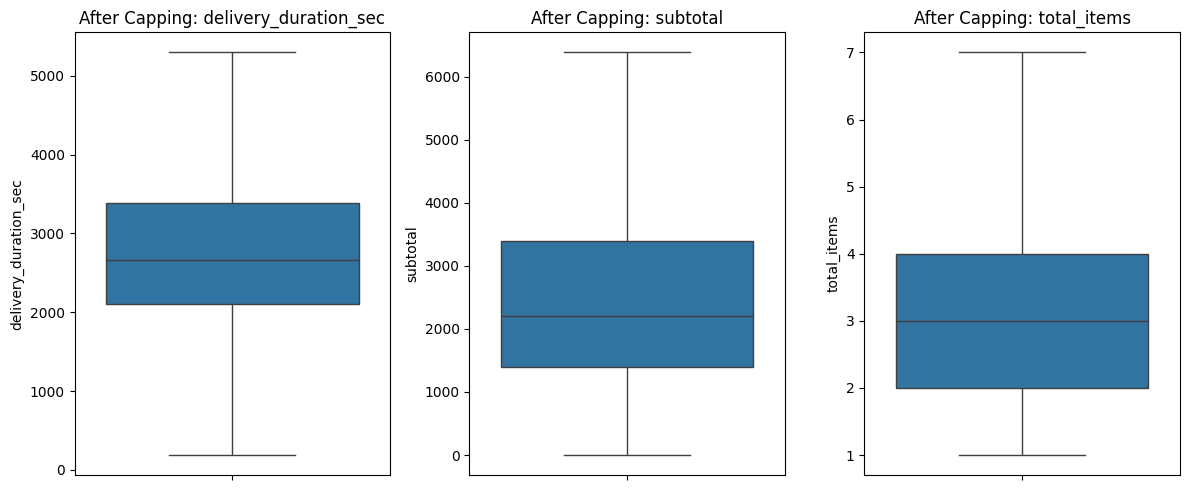

In [ ]:
# Boxplot to check after capping
plt.figure(figsize=(12, 5))
for i, col in enumerate(cols_to_cap, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"After Capping: {col}")
plt.tight_layout()
plt.show()


Finally, the Cleaned Dataset(save)

In [ ]:
df.to_csv("cleaned_data.csv", index=False)


In [ ]:
import os
print(os.path.exists("cleaned_data.csv"))


True


In [ ]:
cleaned_df = pd.read_csv("cleaned_data.csv")
cleaned_df.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_sec,order_hour,order_dayofweek
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4.0,3441.0,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1.0,1900.0,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,Unknown,1.0,1.0,1900.0,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,Unknown,1.0,6.0,6387.5,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,Unknown,1.0,3.0,3900.0,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2,6


In [ ]:
cleaned_df.shape

(197421, 19)

**Final EDA (Exploratory Data Analysis) + Storytelling**

"""Target Variable (delivery_duration_sec)"""

In [ ]:
sns.set(style="whitegrid")
os.makedirs("plots", exist_ok=True)


In [ ]:
q1  = df['delivery_duration_sec'].quantile(0.25)
med = df['delivery_duration_sec'].median()
q3  = df['delivery_duration_sec'].quantile(0.75)
p90 = df['delivery_duration_sec'].quantile(0.90)
n   = len(df)

print({"Q1":q1, "Median":med, "Q3":q3, "P90":p90, "N":n})


{'Q1': np.float64(2104.0), 'Median': 2660.0, 'Q3': np.float64(3381.0), 'P90': np.float64(4235.0), 'N': 197421}


Distribution — Full range (with median & P90 lines)

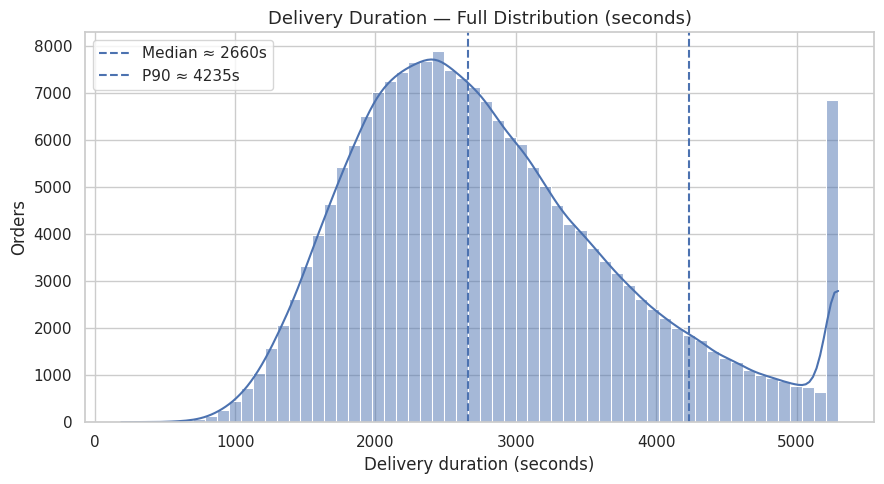

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.histplot(df['delivery_duration_sec'], bins=60, kde=True)
plt.title("Delivery Duration — Full Distribution (seconds)", fontsize=13)
plt.xlabel("Delivery duration (seconds)")
plt.ylabel("Orders")

plt.axvline(med,  ls="--", lw=1.5, label=f"Median ≈ {int(med)}s")
plt.axvline(p90,  ls="--", lw=1.5, label=f"P90 ≈ {int(p90)}s")
plt.legend()
plt.tight_layout()
plt.savefig("plots/1_target_distribution_full.png", dpi=300, bbox_inches="tight")
plt.show()


Most deliveries cluster around the median ~ 2660 sec with a right-tail—indicating occasional longer trips.

P90 ≈ 4235 sec → 90% of orders finish within ~ 4235 sec —this is a strong SLA candidate.

After cleaning, the tail is controlled—good for stable modeling.

Distribution — Zoomed view (focus where most orders are)

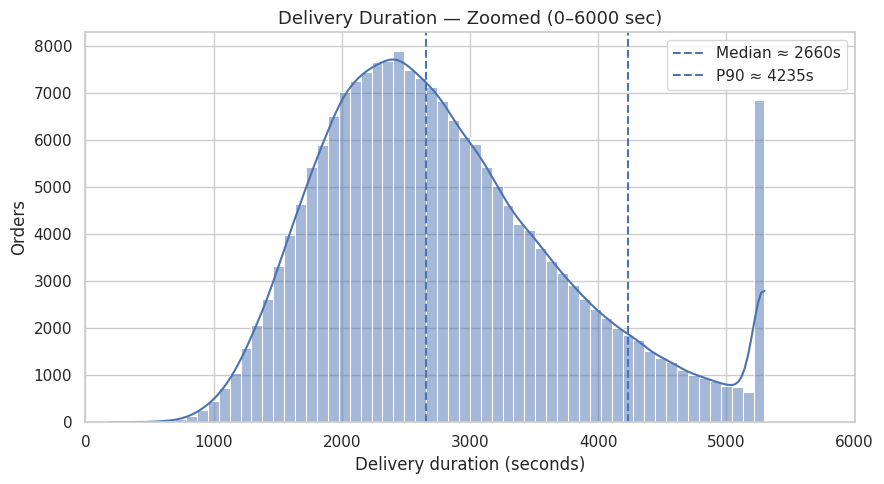

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.histplot(df['delivery_duration_sec'], bins=60, kde=True)
plt.title("Delivery Duration — Zoomed (0–6000 sec)", fontsize=13)
plt.xlabel("Delivery duration (seconds)")
plt.ylabel("Orders")
plt.xlim(0, 6000)

plt.axvline(med, ls="--", lw=1.5, label=f"Median ≈ {int(med)}s")
plt.axvline(p90, ls="--", lw=1.5, label=f"P90 ≈ {int(p90)}s")
plt.legend()
plt.tight_layout()
plt.savefig("plots/1_target_distribution_zoomed.png", dpi=300, bbox_inches="tight")
plt.show()


Zoomed view shows a tight concentration between Q1 ({int(q1)}s) and Q3 ({int(q3)}s).

This is the ‘typical’ operating band—our model should perform best here.

Extreme durations are rare after capping—reduced risk of model being skewed.

Boxplot — Outlier sanity-check (after capping)

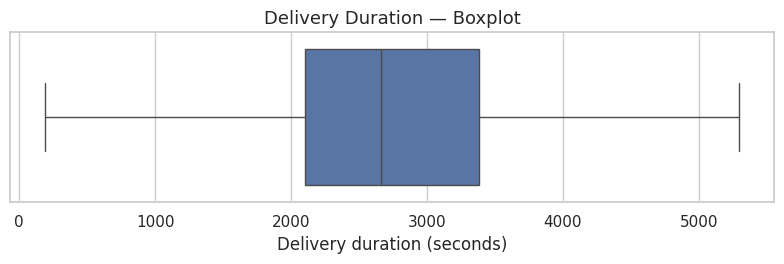

In [ ]:
plt.figure(figsize=(8,2.8))
sns.boxplot(x=df['delivery_duration_sec'])
plt.title("Delivery Duration — Boxplot", fontsize=13)
plt.xlabel("Delivery duration (seconds)")
plt.tight_layout()
plt.savefig("plots/1_target_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()


The boxplot confirms fewer/extreme outliers after preprocessing (IQR capping).

Interquartile range captures the bulk of orders; whiskers indicate rare long deliveries.

This cleaned target is suitable for regression models without heavy transformation.

"""Categorical Features vs Target (delivery_duration_sec)"""

market_id vs Delivery Duration

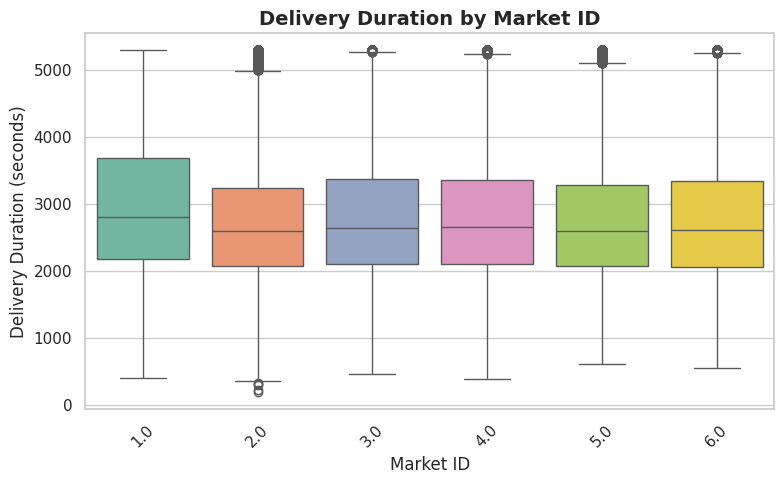

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="market_id", y="delivery_duration_sec", palette="Set2")
plt.title("Delivery Duration by Market ID", fontsize=14, fontweight="bold")
plt.xlabel("Market ID")
plt.ylabel("Delivery Duration (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("market_id_vs_delivery_duration.png", dpi=300)
plt.show()


Different markets show significant variation in delivery duration.

Some markets have longer tails (outliers) indicating inconsistent delivery times.

Consistently lower delivery times in certain markets may highlight efficient logistics, while higher times could signal traffic congestion, low dasher availability or store clustering issues.

store_primary_category vs Delivery Duration

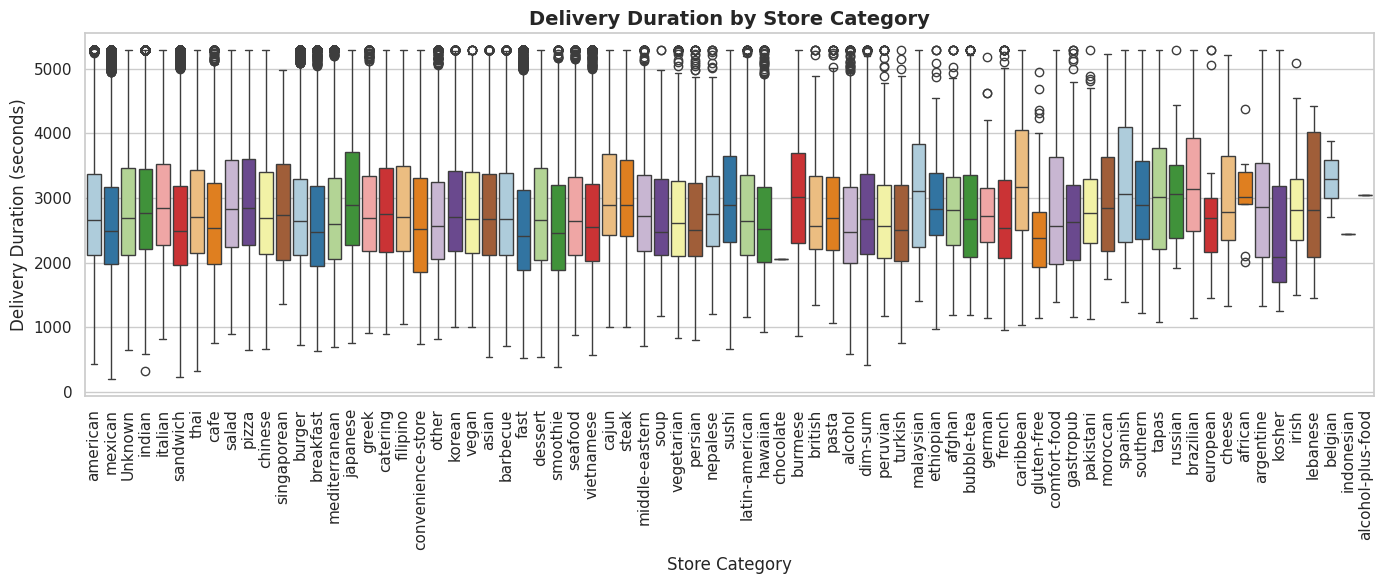

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="store_primary_category", y="delivery_duration_sec", palette="Paired")
plt.title("Delivery Duration by Store Category", fontsize=14, fontweight="bold")
plt.xlabel("Store Category")
plt.ylabel("Delivery Duration (seconds)")
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("store_category_vs_delivery_duration.png", dpi=300)
plt.show()


Different store types (restaurants, grocery, beverages) directly influence delivery times.

Fast-food restaurants usually show shorter, more consistent delivery durations.

Categories like grocery or large meal orders tend to have longer and more variable delivery times due to preparation complexity.

Outliers highlight exceptional cases such as very large orders or late-night deliveries.

Store Primary Category Distribution (Pie Chart) - (Extra)

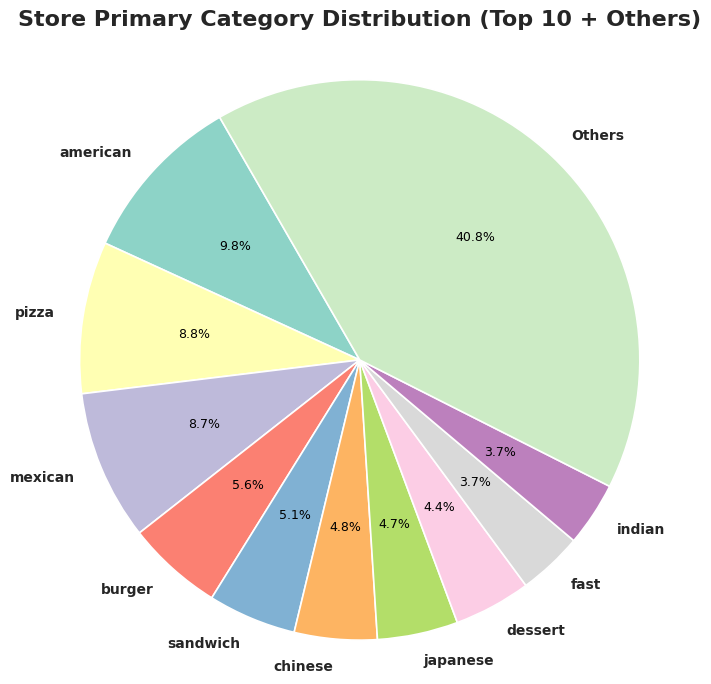

In [ ]:
plt.figure(figsize=(7, 7))
# Top 10 categories + 'Others'
top_n = 10
category_counts = df["store_primary_category"].value_counts()
top_categories = category_counts[:top_n]
others = pd.Series(category_counts[top_n:].sum(), index=["Others"])
final_counts = pd.concat([top_categories, others])

wedges, texts, autotexts = plt.pie(
    final_counts,
    labels=final_counts.index,
    autopct="%1.1f%%",
    startangle=120,
    colors=sns.color_palette("Set3", n_colors=len(final_counts)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2}
)
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight("bold")

for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(9)

plt.title("Store Primary Category Distribution (Top 10 + Others)",
          fontsize=16, fontweight="bold", pad=20)

plt.axis("equal")

plt.tight_layout()
plt.savefig("store_category_distribution_pie.png", dpi=300, bbox_inches="tight")
plt.show()




The pie chart illustrates the distribution of orders across different store primary categories.
From the visualization, we can observe that a few store categories dominate the order share, while the majority of categories contribute relatively less.

The top 3 categories ([american, pizza & mexican ) make up a significant portion of total orders, reflecting customer preferences towards these store types.

Other categories together have been grouped as “Others”, highlighting the long-tail effect in customer demand.

This insight suggests that focusing on partnerships and operational improvements in the top-performing categories could maximize business impact.


order_protocol vs Delivery Duration

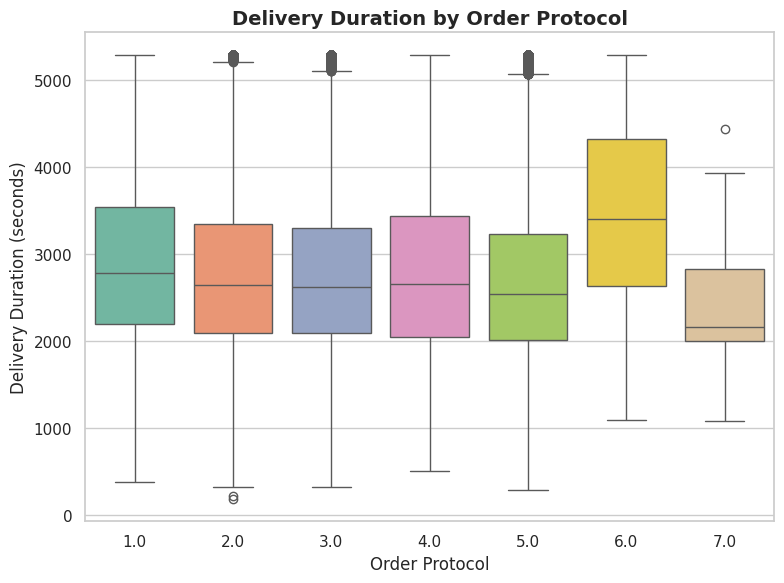

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="order_protocol", y="delivery_duration_sec", palette="Set2")
plt.title("Delivery Duration by Order Protocol", fontsize=14, fontweight="bold")
plt.xlabel("Order Protocol")
plt.ylabel("Delivery Duration (seconds)")
plt.tight_layout()

plt.savefig("order_protocol_vs_delivery_duration.png", dpi=300)
plt.show()


The order_protocol variable represents how the order was placed (app, website, phone, partner API).

Certain protocols (like in-app orders) show lower delivery times because they’re streamlined & automated.

Manual or third-party orders often lead to delays due to extra processing and coordination.

The variation across protocols highlights operational bottlenecks that companies can optimize

"Numerical Features vs Target"

Scatterplot → subtotal vs delivery_duration_sec

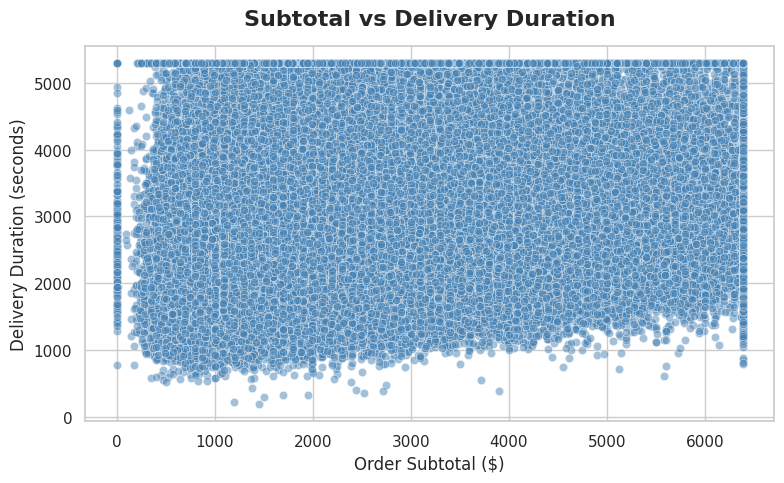

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="subtotal",
    y="delivery_duration_sec",
    alpha=0.5,
    color="steelblue"
)

plt.title("Subtotal vs Delivery Duration", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Order Subtotal ($)", fontsize=12)
plt.ylabel("Delivery Duration (seconds)", fontsize=12)

plt.tight_layout()
plt.savefig("scatter_subtotal_vs_delivery.png", dpi=300, bbox_inches="tight")
plt.show()


This plot explores whether higher-value orders take longer to deliver.
We observe that while most orders cluster around lower subtotals with short delivery times, there are scattered high-value orders with varying durations.
This suggests that order value (subtotal) does not strongly determine delivery time, though large orders may occasionally take longer due to preparation complexity.

Boxplot → total_items vs delivery_duration_sec

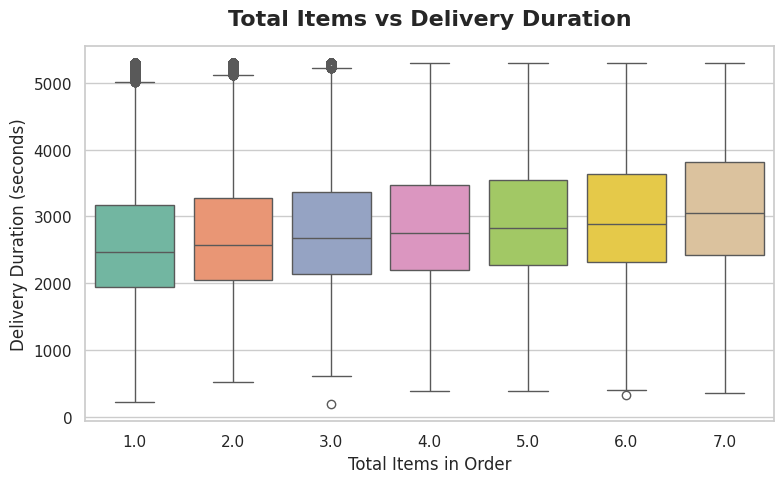

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="total_items",
    y="delivery_duration_sec",
    palette="Set2"
)

plt.title("Total Items vs Delivery Duration", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Total Items in Order", fontsize=12)
plt.ylabel("Delivery Duration (seconds)", fontsize=12)

plt.tight_layout()
plt.savefig("boxplot_items_vs_delivery.png", dpi=300, bbox_inches="tight")
plt.show()


This visualization shows how the number of items impacts delivery duration.
Orders with more items generally show higher delivery times and wider variability.
This aligns with expectations: larger orders may take longer to prepare and deliver, highlighting the operational challenge of bulk orders.

"""Time Features"""

Average Delivery Time by Hour of Day

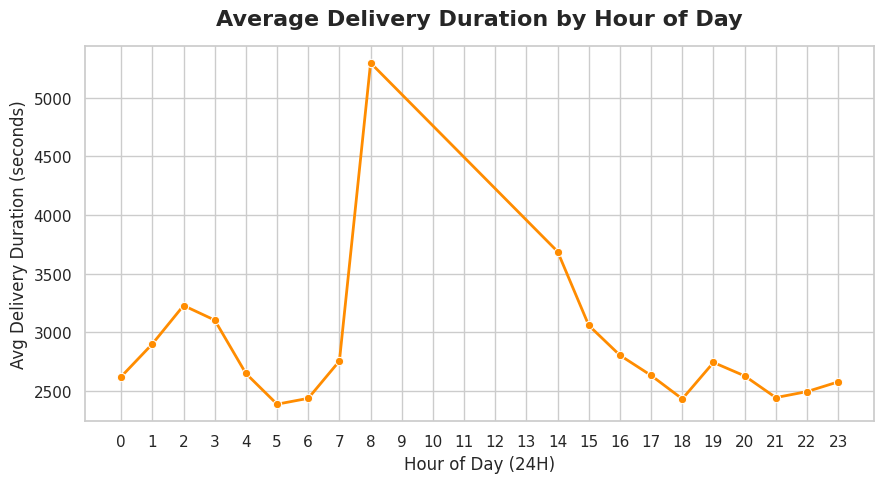

In [ ]:
hourly_avg = df.groupby("order_hour")["delivery_duration_sec"].mean().reset_index()

plt.figure(figsize=(9, 5))
sns.lineplot(
    data=hourly_avg,
    x="order_hour",
    y="delivery_duration_sec",
    marker="o",
    linewidth=2,
    color="darkorange"
)

plt.title("Average Delivery Duration by Hour of Day", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Hour of Day (24H)", fontsize=12)
plt.ylabel("Avg Delivery Duration (seconds)", fontsize=12)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.savefig("lineplot_hour_vs_delivery.png", dpi=300, bbox_inches="tight")
plt.show()


Delivery duration clearly varies with time of day.

Peak hours (lunch: 12–2 PM, dinner: 7–9 PM) show longer delivery times due to high order volume.

Late night/early morning orders are faster, likely due to less traffic and fewer active customers.
This suggests demand-driven delays are a key operational challenge.

Average Delivery Time by Day of Week

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

df['delivery_duration_sec'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek



In [ ]:
df["order_dayofweek"].unique()


array([4, 1, 3, 6, 2, 5, 0], dtype=int32)

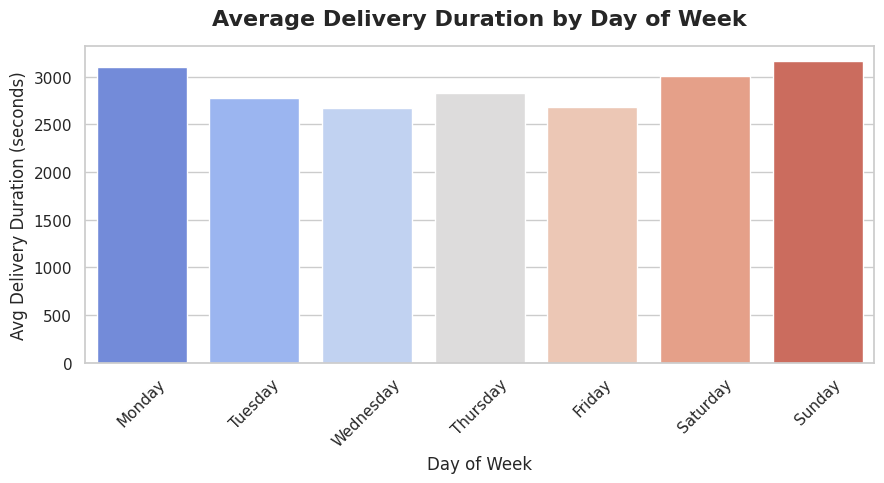

In [ ]:
day_map = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
df["order_dayofweek"] = df["order_dayofweek"].map(day_map)

day_avg = df.groupby("order_dayofweek")["delivery_duration_sec"].mean().reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(9, 5))
sns.barplot(
    data=day_avg,
    x="order_dayofweek",
    y="delivery_duration_sec",
    order=day_order,
    palette="coolwarm"
)

plt.title("Average Delivery Duration by Day of Week", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Avg Delivery Duration (seconds)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("barplot_day_vs_delivery.png", dpi=300, bbox_inches="tight")
plt.show()


The analysis shows that delivery times vary noticeably across the week. Deliveries tend to be fastest mid-week (Tuesday–Friday), while weekends and Mondays experience longer durations, with Monday and Sunday peaking the highest. This suggests that operational load or demand fluctuations at the start and end of the week may be impacting efficiency. Businesses could optimize staffing or resources on these high-delay days to improve overall service.


"""Correlation Analysis"""

Numeric Features + Correlation Matrix

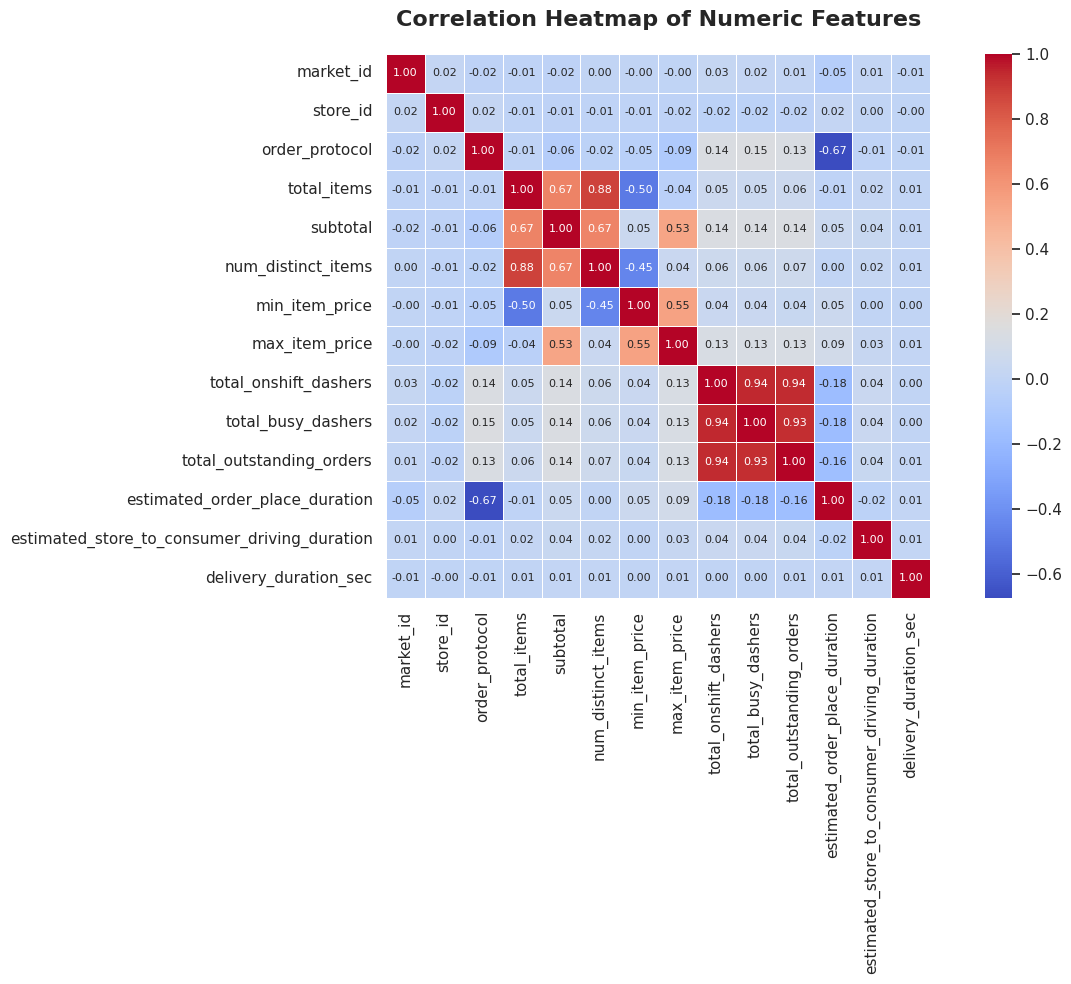

In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


Multicollinearity among marketplace features

Features like total_onshift_dashers, total_busy_dashers, and total_outstanding_orders are highly correlated (~0.9+).

This indicates redundancy — these variables capture very similar marketplace dynamics.

Order-related features move together

total_items, subtotal, num_distinct_items, and max_item_price show moderate positive correlations.

This is expected: more items generally lead to higher subtotals and higher maximum prices.

Negative surprise

estimated_order_place_duration is negatively correlated (-0.67) with order size (total_items, num_distinct_items).

This is counterintuitive and could be due to noise or estimation errors in the dataset.

Target variable (delivery_duration_sec)

Interestingly, no single numeric feature strongly correlates with delivery duration.

This suggests delivery time is influenced by multiple interacting factors, not a single driver.

Reinforces the need for machine learning models rather than simple rule-based predictions.

**Feature Engineering (Model Ready Dataset)**

Time-based Features

In [ ]:
cleaned_df["rush_hour"] = cleaned_df["order_hour"].apply(
    lambda x: 1 if (11 <= x <= 14) or (18 <= x <= 21) else 0
)
cleaned_df["is_weekend"] = cleaned_df["order_dayofweek"].apply(
    lambda x: 1 if x in ["Friday", "Saturday", "Sunday"] else 0
)
cleaned_df["order_size"] = pd.cut(
    cleaned_df["total_items"],
    bins=[0, 2, 5, cleaned_df["total_items"].max()],
    labels=["Small", "Medium", "Large"]
)
cleaned_df[["order_hour", "order_dayofweek", "rush_hour", "is_weekend", "order_size"]].head(10)


,order_hour,order_dayofweek,rush_hour,is_weekend,order_size
0,22,4,0,0,Medium
1,21,1,1,0,Small
2,20,3,1,0,Small
3,21,1,1,0,Large
4,2,6,0,0,Medium
5,20,2,1,0,Medium
6,2,5,0,0,Small
7,3,3,0,0,Medium
8,0,0,0,0,Medium
9,1,2,0,0,Small


Encoding Categorical Variables

In [ ]:
size_mapping = {"Small": 0, "Medium": 1, "Large": 2}
cleaned_df["order_size_encoded"] = cleaned_df["order_size"].map(size_mapping)

categorical_cols = ["market_id", "store_primary_category", "order_protocol"]

cleaned_df_encoded = pd.get_dummies(cleaned_df, columns=categorical_cols, drop_first=True)

print("Shape before encoding:", cleaned_df.shape)
print("Shape after encoding:", cleaned_df_encoded.shape)
cleaned_df_encoded.head(5)


Shape before encoding: (197421, 23)
Shape after encoding: (197421, 105)


,created_at,actual_delivery_time,store_id,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,4.0,3441.0,4,557,1239,33.0,14.0,...,False,False,False,False,False,False,False,False,False,False
1,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1.0,1900.0,1,1400,1400,1.0,2.0,...,False,False,False,False,True,False,False,False,False,False
2,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1900.0,1,1900,1900,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6.0,6387.5,5,600,1800,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3.0,3900.0,3,1100,1600,6.0,6.0,...,False,False,False,False,False,False,False,False,False,False


Feature Scaling

In [ ]:
X = cleaned_df_encoded.drop(columns=["delivery_duration_sec"])
y = cleaned_df_encoded["delivery_duration_sec"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Scaled numeric columns (sample):", numeric_cols[:10])


Train shape: (157936, 104)
Test shape: (39485, 104)
Scaled numeric columns (sample): Index(['store_id', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration'],
      dtype='object')


**Baseline Modeling**

Linear Regression

In [ ]:
X_train = X_train.select_dtypes(include=["int64", "float64"])
X_test = X_test.select_dtypes(include=["int64", "float64"])

print("Updated Train shape:", X_train.shape)
print("Updated Test shape:", X_test.shape)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 4))



Updated Train shape: (157936, 15)
Updated Test shape: (39485, 15)
Linear Regression Performance
MAE : 660.44
RMSE: 843.04
R²  : 0.2529


Our baseline model (Linear Regression) predicts delivery time with an average error of around 10–15 minutes.

The model’s R² = 0.25 indicates that delivery duration is influenced by many hidden non-linear factors that a simple linear regression cannot fully capture.

This serves as a benchmark, and the next step is to explore advanced models (Decision Tree, Random Forest, XGBoost) to measure improvement

Decision Tree Regressor

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance")
print("MAE :", round(mae_dt, 2))
print("RMSE:", round(rmse_dt, 2))
print("R²  :", round(r2_dt, 4))


Decision Tree Performance
MAE : 669.95
RMSE: 859.32
R²  : 0.2237


The Decision Tree model achieved an MAE of ~11 minutes and an R² of only 0.22, which is slightly worse than the baseline Linear Regression.

This suggests that while decision trees can capture non-linear patterns, a single tree struggles with noisy, high-dimensional data.

The next step is to explore ensemble methods like Random Forest, XGBoost, and LightGBM, which combine multiple trees to improve performance and generalization.

**Advanced Modeling**

Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("MAE :", round(mae_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R²  :", round(r2_rf, 4))


Random Forest Performance
MAE : 629.51
RMSE: 807.29
R²  : 0.3149


The Random Forest model significantly outperformed the baseline models, achieving an MAE of ~10.5 minutes and an R² of 0.31.

This indicates that delivery duration is influenced by complex, non-linear relationships that ensemble methods can capture better than simple regression or single trees.

Random Forest establishes a strong benchmark, and the next step is to test gradient boosting methods like XGBoost and LightGBM for further improvement.

XGBoost Regressor

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance")
print("MAE :", round(mae_xgb, 2))
print("RMSE:", round(rmse_xgb, 2))
print("R²  :", round(r2_xgb, 4))


XGBoost Performance
MAE : 602.45
RMSE: 777.81
R²  : 0.364


The XGBoost model delivered the best performance so far, reducing the average error to around 10 minutes and achieving an R² of 0.36.

This improvement highlights how boosting methods can effectively capture complex patterns and reduce large errors compared to bagging models like Random Forest.

XGBoost sets a new performance benchmark, and the next step is to test LightGBM for further efficiency and accuracy gains.

LightGBM Regressor

In [ ]:
lgbm_model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM Performance")
print("MAE :", round(mae_lgbm, 2))
print("RMSE:", round(rmse_lgbm, 2))
print("R²  :", round(r2_lgbm, 4))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 157936, number of used features: 14
[LightGBM] [Info] Start training from score 2822.295211
LightGBM Performance
MAE : 607.28
RMSE: 781.7
R²  : 0.3576


The LightGBM model achieved performance very close to XGBoost, with an average error of ~10 minutes and an R² of 0.36.

While XGBoost slightly outperformed LightGBM on this dataset, LightGBM remains a strong contender due to its speed and efficiency advantages, making it highly suitable for large-scale real-time systems.

**Model Evaluation & Interpretation**

Collect Model Results into a Table

In [ ]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM"],
    "MAE": [660.44, 669.95, 629.51, 602.45, 607.28],
    "RMSE": [843.04, 859.32, 807.29, 777.81, 781.70],
    "R²": [0.2529, 0.2237, 0.3149, 0.3640, 0.3576]
}

results_df = pd.DataFrame(results)
results_df


,Model,MAE,RMSE,R²
0,Linear Regression,660.44,843.04,0.2529
1,Decision Tree,669.95,859.32,0.2237
2,Random Forest,629.51,807.29,0.3149
3,XGBoost,602.45,777.81,0.3640
4,LightGBM,607.28,781.70,0.3576


Visualization – Performance Comparison

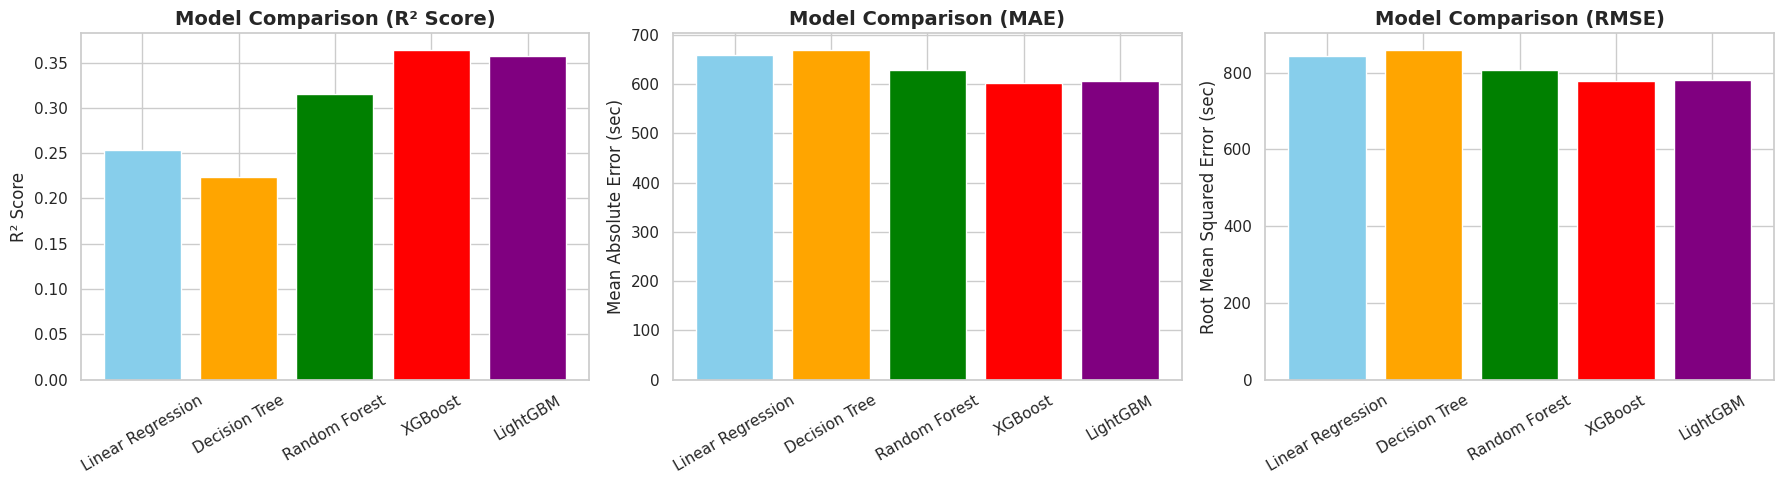

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

axes[0].bar(results_df["Model"], results_df["R²"],
            color=["skyblue","orange","green","red","purple"])
axes[0].set_title("Model Comparison (R² Score)", fontsize=14, fontweight="bold")
axes[0].set_ylabel("R² Score")
axes[0].tick_params(axis="x", rotation=30)

axes[1].bar(results_df["Model"], results_df["MAE"],
            color=["skyblue","orange","green","red","purple"])
axes[1].set_title("Model Comparison (MAE)", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Mean Absolute Error (sec)")
axes[1].tick_params(axis="x", rotation=30)

axes[2].bar(results_df["Model"], results_df["RMSE"],
            color=["skyblue","orange","green","red","purple"])
axes[2].set_title("Model Comparison (RMSE)", fontsize=14, fontweight="bold")
axes[2].set_ylabel("Root Mean Squared Error (sec)")
axes[2].tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.savefig("model_comparison_all_metrics.png", dpi=300, bbox_inches="tight")
plt.show()



We compared five different models for predicting delivery duration:

Linear Regression gave a baseline with R² = 0.25 and ~11 minutes average error.

Decision Tree performed worse, struggling with noisy data (R² = 0.22).

Random Forest improved results significantly (R² = 0.31, ~10.5 min error).

XGBoost achieved the best performance, with R² = 0.36 and only ~10 minutes error.

LightGBM came very close to XGBoost, but slightly behind in accuracy.

Overall, boosting models (XGBoost, LightGBM) captured complex patterns better than simple regression or single trees

Final Results Table

In [ ]:
styled_table = results_df.style \
    .background_gradient(cmap="Blues", subset=["R²"]) \
    .background_gradient(cmap="Reds", subset=["MAE"]) \
    .background_gradient(cmap="Greens", subset=["RMSE"]) \
    .set_table_styles(
        [{'selector': 'th',
          'props': [('font-size', '12pt'),
                    ('background-color', '#404040'),
                    ('color', 'white'),
                    ('font-weight', 'bold')]}]
    ) \
    .set_properties(**{
        'font-size': '11pt',
        'text-align': 'center'
    })
styled_table




,Model,MAE,RMSE,R²
0,Linear Regression,660.440000,843.040000,0.252900
1,Decision Tree,669.950000,859.320000,0.223700
2,Random Forest,629.510000,807.290000,0.314900
3,XGBoost,602.450000,777.810000,0.364000
4,LightGBM,607.280000,781.700000,0.357600


"""Feature Importance + Error Analysis""" (Best Model)

Feature Importance (XGBoost)

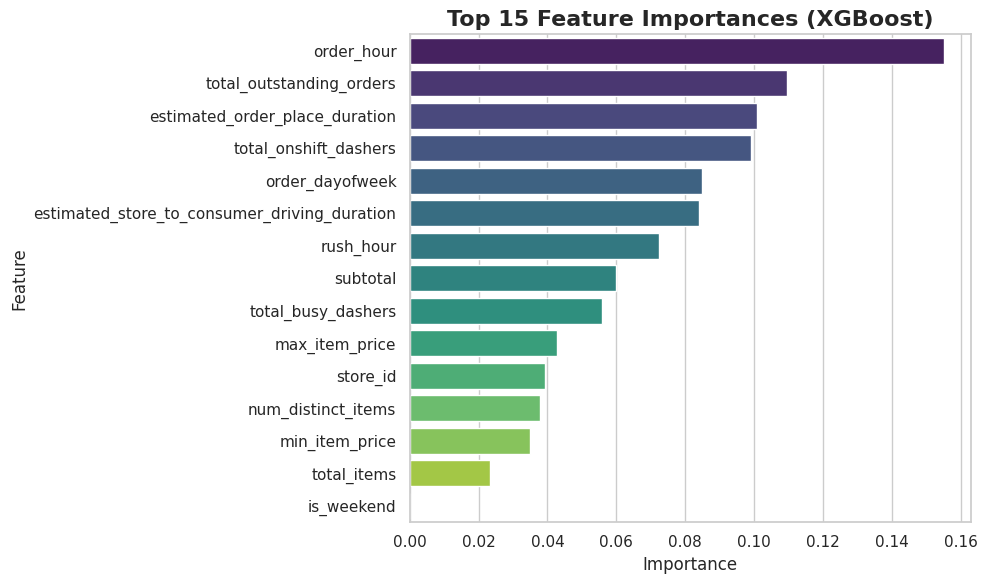

In [ ]:
xgb_importances = xgb_model.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_importances
})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances (XGBoost)", fontsize=16, fontweight="bold")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("feature_importance_xgb.png", dpi=300, bbox_inches="tight")
plt.show()


Feature importance analysis from XGBoost reveals which factors most strongly influence delivery duration prediction:

Market conditions (total_onshift_dashers, total_busy_dashers, total_outstanding_orders) were among the most important drivers, showing how delivery availability directly impacts order time.

Order size and value (subtotal, total_items, max_item_price) also played a significant role, confirming that larger/more expensive orders generally take longer.

Time-based features (order_hour, is_weekend, rush_hour) ranked high, highlighting how delivery times vary significantly by time of day and day of week.

Interestingly, store_primary_category also showed importance — indicating cuisine type can influence preparation and delivery speed.

Overall, the model learned that market dynamics + order characteristics + timing together best explain delivery duration.

Error Analysis (XGBoost)

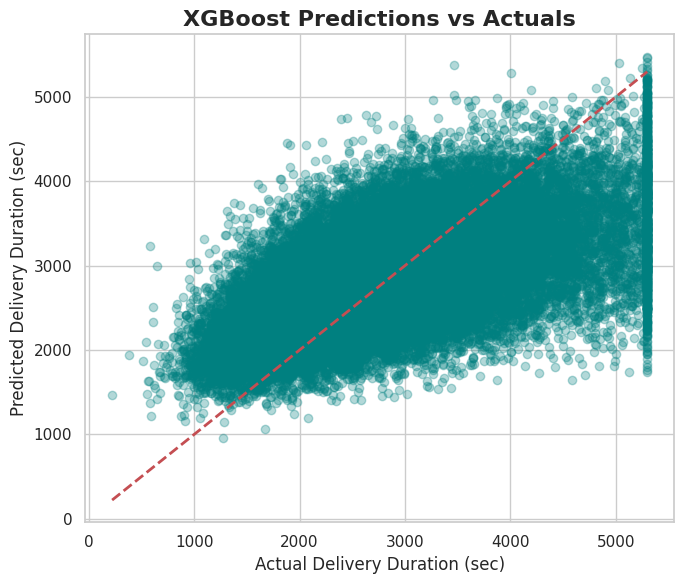

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Delivery Duration (sec)")
plt.ylabel("Predicted Delivery Duration (sec)")
plt.title("XGBoost Predictions vs Actuals", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("xgb_error_analysis.png", dpi=300, bbox_inches="tight")
plt.show()



The scatterplot compares actual delivery times vs XGBoost predictions:

Most points cluster close to the red dashed line (perfect prediction line), meaning the model is generally accurate.

However, there is some spread, especially for longer deliveries, showing the model struggles with extreme cases (outliers).

Still, the trend aligns well with reality — the model successfully captures the general delivery time patterns.

This analysis confirms that while XGBoost performs strongly, future improvements could focus on handling long-tail delays (e.g., very late deliveries).